In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg

In [2]:
def draw_ellipse(center=(100, 10), radii=(20, 20), t_rot=pi/4, 
                 grid=1000, boundary=(100, 100), background=0, foreground=1):
    
    # grid is how precise the ellipse would be : larger the better

    # u, v: x, y-position of the center
    u, v = center 
    
    # a, b: radius on the x, y-axis
    a, b = radii
    
    # x, y: the bounding box x, y-axis
    x, y = boundary
    
    # t_rot: rotational angle, in radians

    t = np.linspace(0, 2*pi, grid)
    
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
         #u,v removed to keep the same center location
    
    R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
         #2-D rotation matrix

    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
        
    overall_image = np.ones((x, y)) * background
    
    
    for points in range(len(Ell_rot[0,:])):
        x_coord = int(round(Ell_rot[0,:][points] + u))
        y_coord = int(round(Ell_rot[1,:][points] + v))
        if x_coord < x and y_coord < y and x_coord >= 0 and y_coord >= 0:
            overall_image[x_coord][y_coord] = foreground
        
    return overall_image

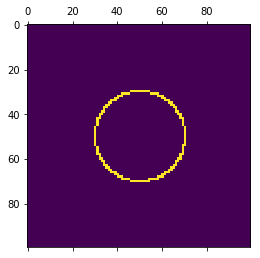

In [3]:
c = draw_ellipse((50, 50))
plt.matshow(c)

In [4]:
def draw_rectangle(center=(100, 10), length=(30, 20), t_rot=pi/4, 
                   grid=1000, boundary=(100, 100) , background=0, foreground=1):
    
    # grid is how precise the ellipse would be : larger the better

    # u, v: x, y-position of the center
    u, v = center 
    
    # a, b: length on the x, y-axis
    a, b = length
    
    # x, y: the bounding box x, y-axis
    x, y = boundary
    
    # t_rot: rotational angle, in radians

    t = np.ones(grid)
    t1 = np.linspace(-1, 1, grid)
    
    
    Ell = np.concatenate([np.array([a*t1 , b*t]), np.array([a*t , -1*b*t1]), np.array([-1*a*t , b*t1]), np.array([-1*a*t1 , -1*b*t])], axis=1)
         #u,v removed to keep the same center location
    
    R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
         #2-D rotation matrix

    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
        
    overall_image = np.ones((x, y)) * background
    
    
    for points in range(len(Ell_rot[0,:])):
        x_coord = int(round(Ell_rot[0,:][points] + u))
        y_coord = int(round(Ell_rot[1,:][points] + v))
        if x_coord < x and y_coord < y and x_coord >= 0 and y_coord >= 0:
            overall_image[x_coord][y_coord] = foreground
        
    return overall_image

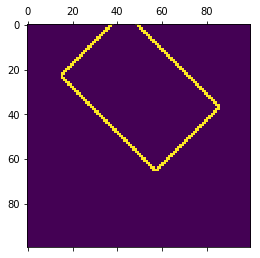

In [5]:
c = draw_rectangle((30, 50))
plt.matshow(c)

In [6]:
def generate_random_ellipses(num_samples, foreground=2, background=1e-5, magnitude=1,
                             
                             image_size=(22, 22), largest_center=22, largest_radii=11):
    image_list = []
    rand_centers = np.random.randint(1, largest_center, size=(num_samples, 2))
    rand_radii = np.random.randint(1, largest_radii, size=(num_samples, 2))
    rand_rot = np.random.rand((num_samples)) * 2*pi
    for i in range(num_samples):
        image_list.append(draw_ellipse(center = rand_centers[i], 
                                       radii = rand_radii[i], t_rot = rand_rot[i], 
                                       boundary = image_size, foreground = foreground, background = background))
        if (10 * i) % num_samples == 0:
            print(str(i / num_samples) + " percent finished")
    images = np.array(image_list)
    images = np.expand_dims(images, axis=1)
    magnitudes = np.ones(images.shape) * magnitude
    return np.concatenate((magnitudes, images), axis=1)
    
    
    
        

In [7]:
def generate_random_rectangles(num_samples, foreground=2, background=1e-5, magnitude=1,
                             
                             image_size=(22, 22), largest_center=22, largest_radii=11):
    image_list = []
    rand_centers = np.random.randint(1, largest_center, size=(num_samples, 2))
    rand_radii = np.random.randint(1, largest_radii, size=(num_samples, 2))
    rand_rot = np.random.rand((num_samples)) * 2*pi
    for i in range(num_samples):
        image_list.append(draw_rectangle(center = rand_centers[i], 
                                       length = rand_radii[i], t_rot = rand_rot[i], 
                                       boundary = image_size, foreground = foreground, background = background))
        if (10 * i) % num_samples == 0:
            print(str(i / num_samples) + " percent finished")
    images = np.array(image_list)
    images = np.expand_dims(images, axis=1)
    magnitudes = np.ones(images.shape) * magnitude
    return np.concatenate((magnitudes, images), axis=1)
    

0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished


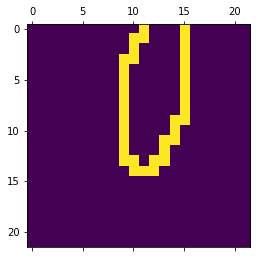

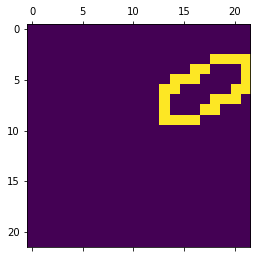

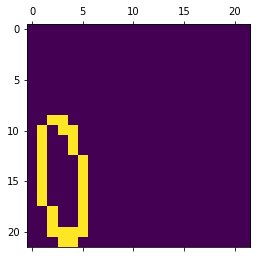

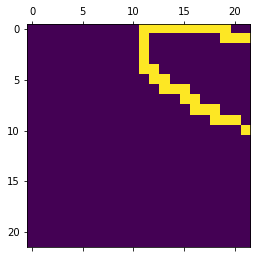

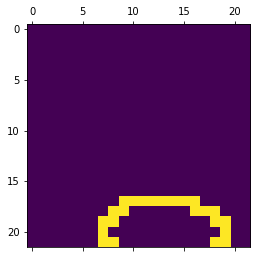

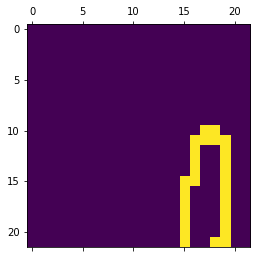

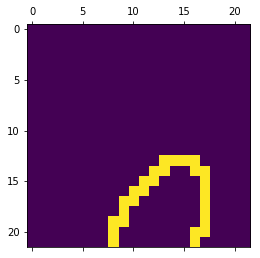

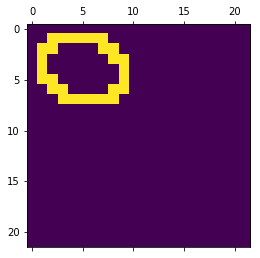

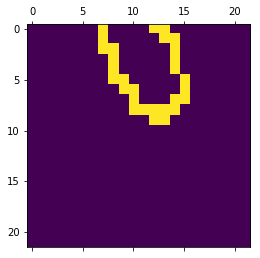

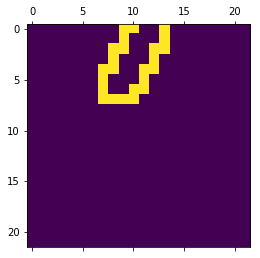

In [8]:
aa=generate_random_ellipses(10)
for i in range(len(aa)):
    plt.matshow(np.log(aa[i, 0, ...]))
    plt.matshow(np.cos(aa[i, 1, ...]))
    plt.matshow(np.sin(aa[i, 1, ...]))

In [ ]:
# Use filled disk/rectangles (No rotation) (background noise, independent gaussian noise in x,y channel) 
# signal: magnitude ~ 1 vs 0.1

# Radius start from 5 - 10, image size 25

# Try out

# angle is more indicative in high dimensional space

0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished


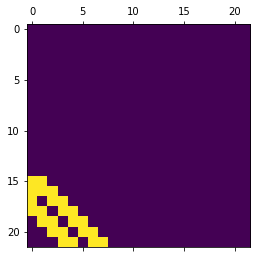

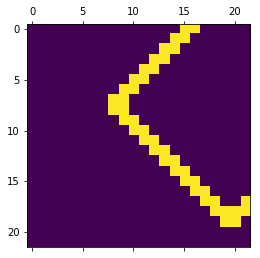

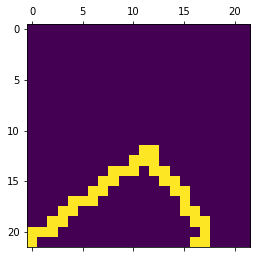

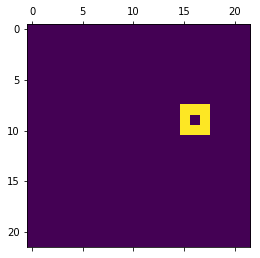

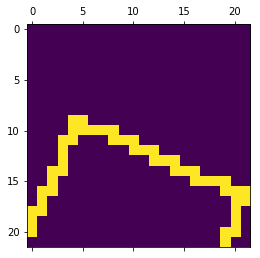

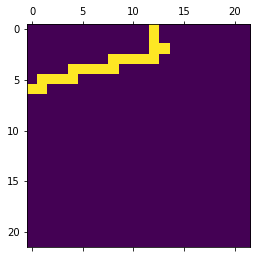

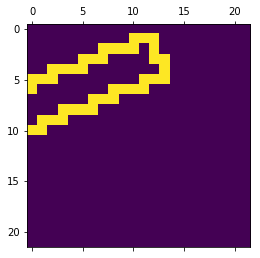

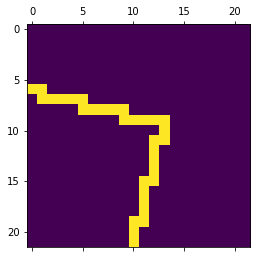

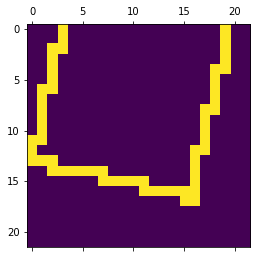

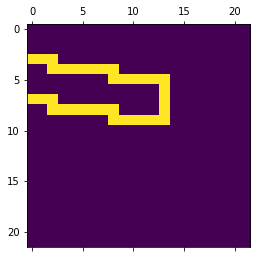

In [9]:
aa=generate_random_rectangles(10)
for i in range(len(aa)):
    plt.matshow(aa[i, 1, ...])

In [ ]:
aa=generate_random_rectangles(10, image_size=(22, 22), largest_center=22)
for i in range(len(aa)):
    plt.matshow(aa[i, 1, ...])

In [10]:
aa=generate_random_ellipses(5000)
bb=generate_random_ellipses(5000)
np.save("ellipses.npy", aa)
np.save("rectangles.npy", bb)

0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished
0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished


In [68]:
def draw_ellipse_solid(radii=(20, 20), t_rot=pi/4, 
                 grid=1000, boundary=(100, 100), background=0, foreground=1):
    
    # grid is how precise the ellipse would be : larger the better

    # u, v: x, y-position of the center
    u, v = (int(boundary[0]/2), int(boundary[1]/2))
    
    # a, b: radius on the x, y-axis
    a, b = radii
    
    # x, y: the bounding box x, y-axis
    x, y = boundary
    
    # t_rot: rotational angle, in radians

    t = np.linspace(0, 2*pi, grid)
    
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
         #u,v removed to keep the same center location
    
    
        
    overall_image = np.ones((x, y)) * background
    
    
    min_dict = {}
    max_dict = {}
    
    for points in range(len(Ell[0,:])):
        x_coord = int(round(Ell[0,:][points] + u))
        y_coord = int(round(Ell[1,:][points] + v))
        if x_coord < x and y_coord < y and x_coord >= 0 and y_coord >= 0:
            overall_image[x_coord][y_coord] = foreground
            
            if x_coord not in min_dict:
                min_dict[x_coord] = y_coord
            else:
                min_dict[x_coord] = min(y_coord, min_dict[x_coord])

            if x_coord not in max_dict:
                max_dict[x_coord] = y_coord
            else:
                max_dict[x_coord] = max(y_coord, max_dict[x_coord])
            
            
    
    for i in min_dict.keys():
        for j in range(min_dict[i], max_dict[i]+1):
            overall_image[i][j] = foreground
            
        
    return overall_image

In [69]:
def generate_random_ellipses_solid(num_samples, foreground=2, background=1e-5, magnitude=1,
                             
                             image_size=(23, 23), largest_center=22, largest_radii=10):
    image_list = []
    rand_centers = np.random.randint(5, largest_center, size=(num_samples, 2))
    rand_radii = np.random.randint(5, largest_radii, size=(num_samples, 2))
    rand_rot = np.random.rand((num_samples)) * 2*pi
    for i in range(num_samples):
        image_list.append(draw_ellipse_solid(radii = rand_radii[i], t_rot = rand_rot[i], 
                                       boundary = image_size, foreground = foreground, background = background))
        if (10 * i) % num_samples == 0:
            print(str(i / num_samples) + " percent finished")
    images = np.array(image_list)
    images = np.expand_dims(images, axis=1)
    magnitudes = np.ones(images.shape) * magnitude
    return np.concatenate((magnitudes, images), axis=1)

0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


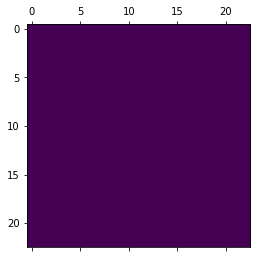

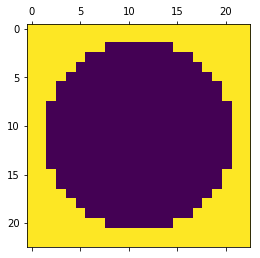

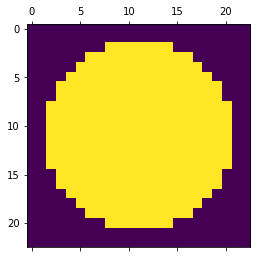

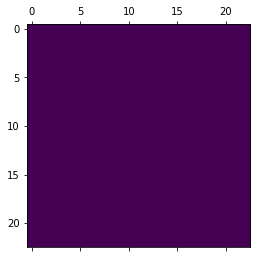

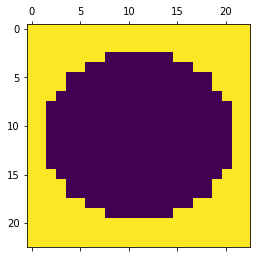

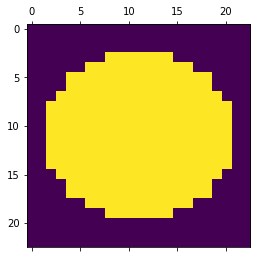

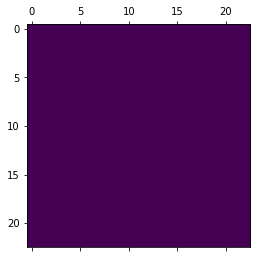

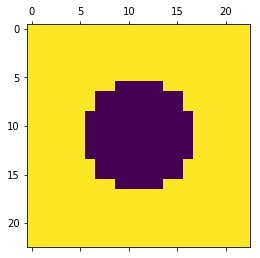

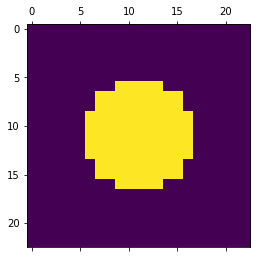

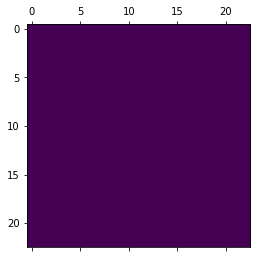

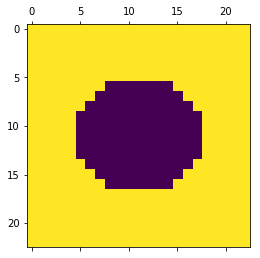

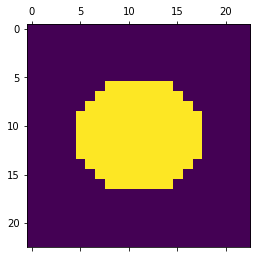

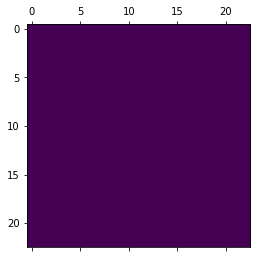

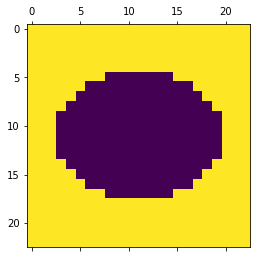

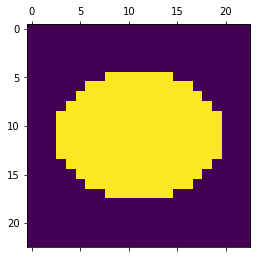

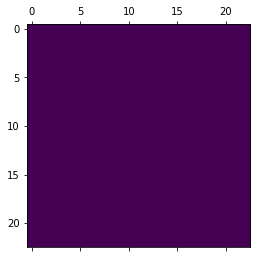

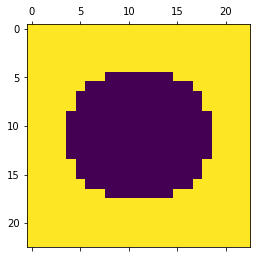

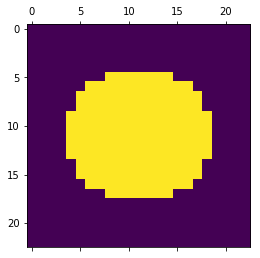

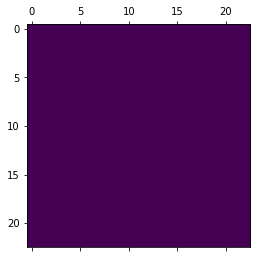

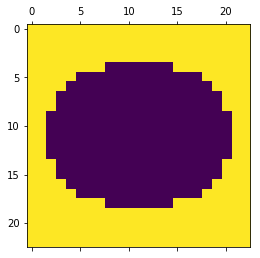

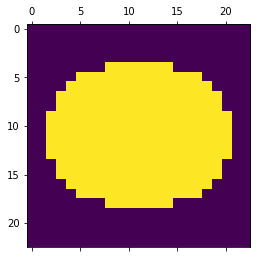

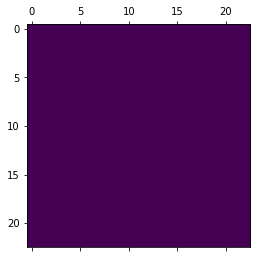

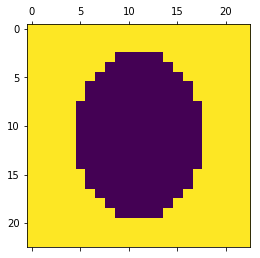

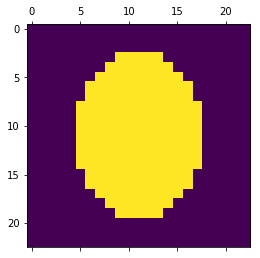

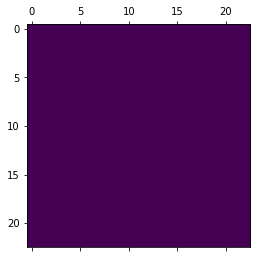

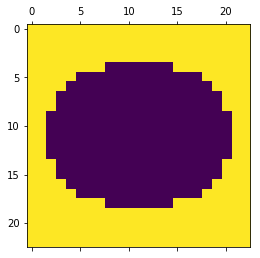

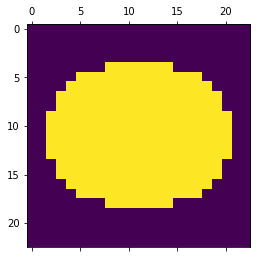

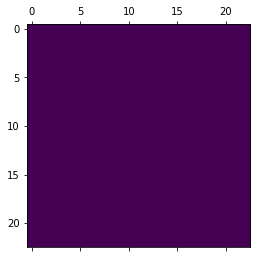

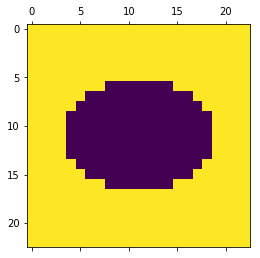

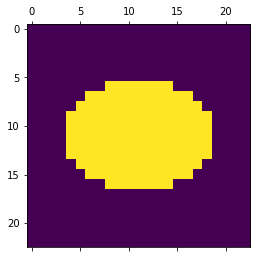

In [88]:
aa=generate_random_ellipses_solid(10)
for i in range(len(aa)):
    
    plt.matshow(np.log(aa[i, 0, ...]))
    plt.matshow(np.cos(aa[i, 1, ...]))
    plt.matshow(np.sin(aa[i, 1, ...]))

In [71]:
def draw_rectangle_solid(length=(30, 20), t_rot=pi/4, 
                   grid=1000, boundary=(100, 100) , background=0, foreground=1):
    
    # grid is how precise the ellipse would be : larger the better

    # u, v: x, y-position of the center
    u, v = (int(boundary[0]/2), int(boundary[1]/2))
    
    # a, b: length on the x, y-axis
    a, b = length
    
    # x, y: the bounding box x, y-axis
    x, y = boundary
    
    # t_rot: rotational angle, in radians

    t = np.ones(grid)
    t1 = np.linspace(-1, 1, grid)
    
    
    Ell = np.concatenate([np.array([a*t1 , b*t]), np.array([a*t , -1*b*t1]), np.array([-1*a*t , b*t1]), np.array([-1*a*t1 , -1*b*t])], axis=1)
         #u,v removed to keep the same center location

    
        
    overall_image = np.ones((x, y)) * background
    
    
    min_dict = {}
    max_dict = {}
    
    for points in range(len(Ell[0,:])):
        x_coord = int(round(Ell[0,:][points] + u))
        y_coord = int(round(Ell[1,:][points] + v))
        if x_coord < x and y_coord < y and x_coord >= 0 and y_coord >= 0:
            overall_image[x_coord][y_coord] = foreground
            
            if x_coord not in min_dict:
                min_dict[x_coord] = y_coord
            else:
                min_dict[x_coord] = min(y_coord, min_dict[x_coord])

            if x_coord not in max_dict:
                max_dict[x_coord] = y_coord
            else:
                max_dict[x_coord] = max(y_coord, max_dict[x_coord])
            
            
    
    for i in min_dict.keys():
        for j in range(min_dict[i], max_dict[i]+1):
            overall_image[i][j] = foreground
        
    return overall_image

In [72]:
def generate_random_rectangles_solid(num_samples, foreground=2, background=1e-5, magnitude=1,
                             
                             image_size=(23, 23), largest_center=22, largest_radii=10):
    image_list = []
    rand_centers = np.random.randint(5, largest_center, size=(num_samples, 2))
    rand_radii = np.random.randint(5, largest_radii, size=(num_samples, 2))
    rand_rot = np.random.rand((num_samples)) * 2*pi
    for i in range(num_samples):
        image_list.append(draw_rectangle_solid(length = rand_radii[i], t_rot = rand_rot[i], 
                                       boundary = image_size, foreground = foreground, background = background))
        if (10 * i) % num_samples == 0:
            print(str(i / num_samples) + " percent finished")
    images = np.array(image_list)
    images = np.expand_dims(images, axis=1)
    magnitudes = np.ones(images.shape) * magnitude
    return np.concatenate((magnitudes, images), axis=1)

0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished


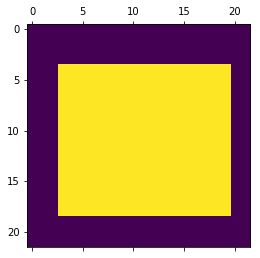

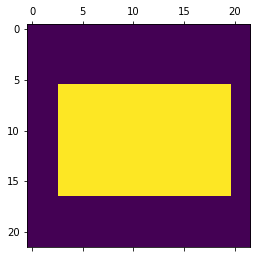

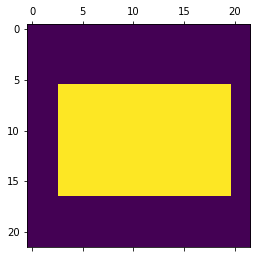

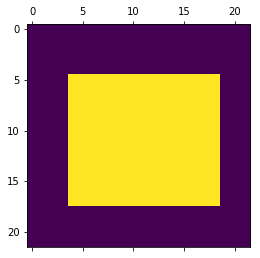

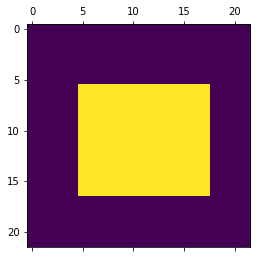

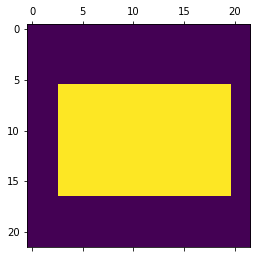

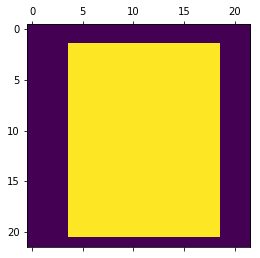

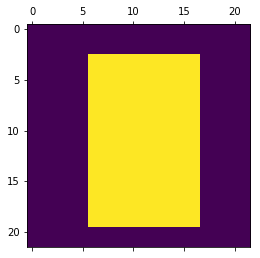

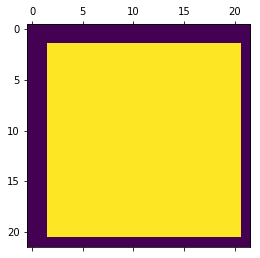

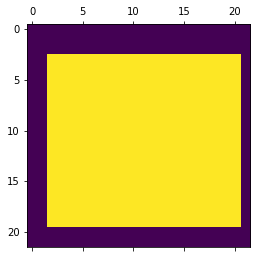

In [73]:
aa=generate_random_rectangles_solid(10, image_size=(22, 22), largest_center=22)
for i in range(len(aa)):
    plt.matshow(aa[i, 1, ...])

In [74]:
aa=generate_random_ellipses_solid(5000)
bb=generate_random_ellipses_solid(5000)
np.save("ellipses.npy", aa)
np.save("rectangles.npy", bb)

0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished
0.0 percent finished
0.1 percent finished
0.2 percent finished
0.3 percent finished
0.4 percent finished
0.5 percent finished
0.6 percent finished
0.7 percent finished
0.8 percent finished
0.9 percent finished


In [86]:
np.load('ellipses.npy')

array([[[[1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
         [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
         [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
         ...,
         [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
         [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
         [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00]],

        [[1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05],
         [1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05],
         [1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05],
         ...,
         [1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05],
         [1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05],
         [1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05]]],


       [[[1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
         [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
         [1.e+00, 1.e+00, 1.e+00, ..., 1.e+00, 1.e+00, 1.e+00],
      